### Import Necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

### Import data set

In [2]:
data = pd.read_csv(r"H:\Data_Science_internship\Assignments-Internship\customer churn prediction\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Statistics and data visualization 

In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

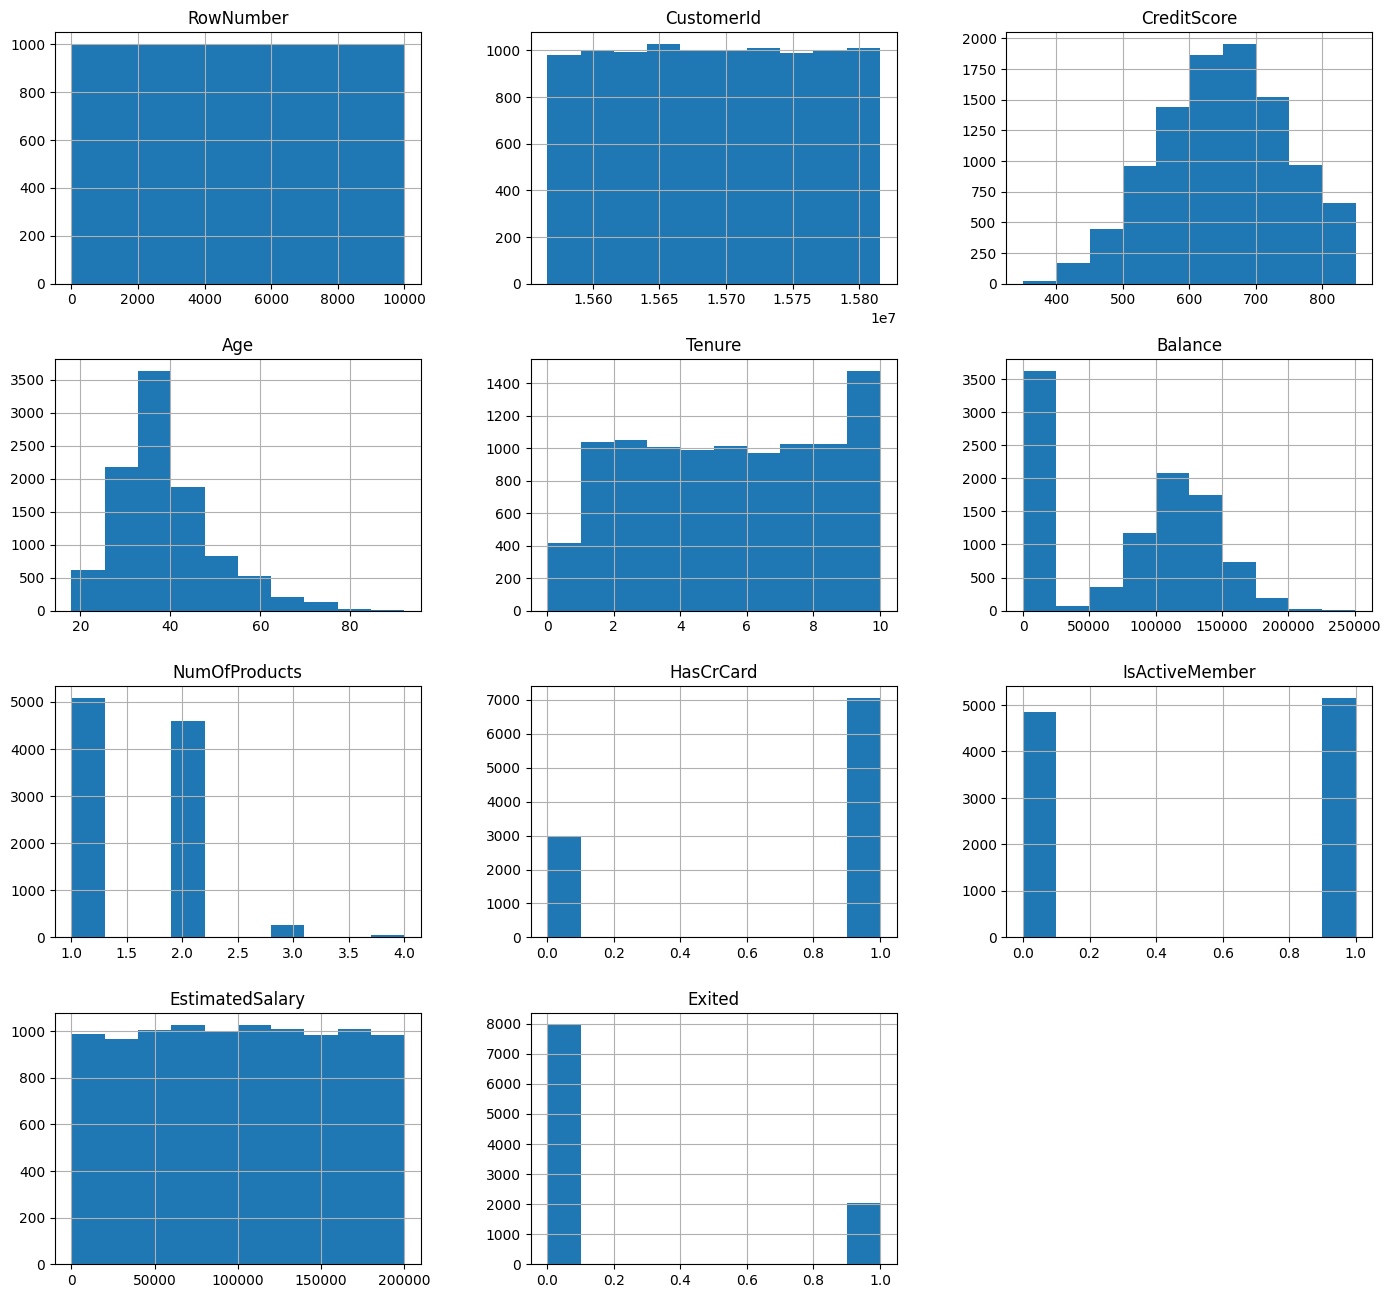

In [7]:
data.hist(figsize = (17,16))
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

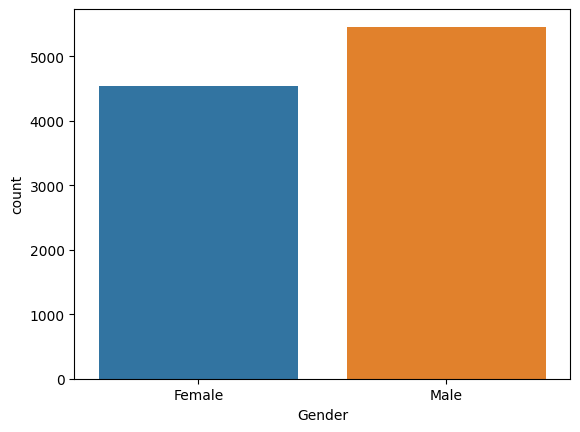

In [8]:
sns.countplot(x = data['Gender'])

<Axes: xlabel='Geography', ylabel='count'>

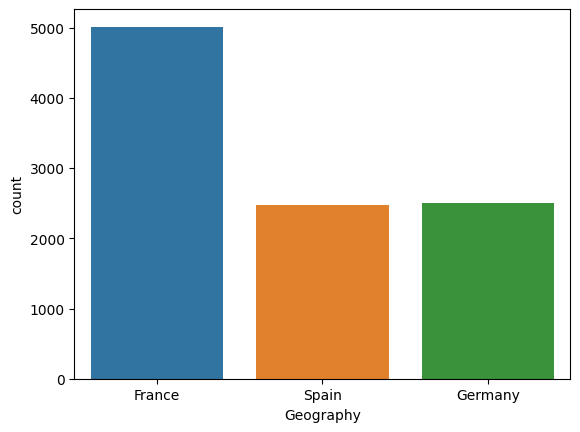

In [9]:
sns.countplot(x = data['Geography'])

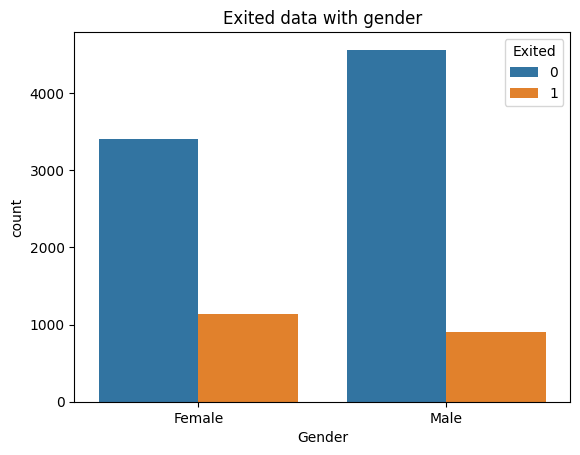

In [10]:
sns.countplot(x="Gender",data=data,hue="Exited")
plt.title("Exited data with gender")
plt.show()

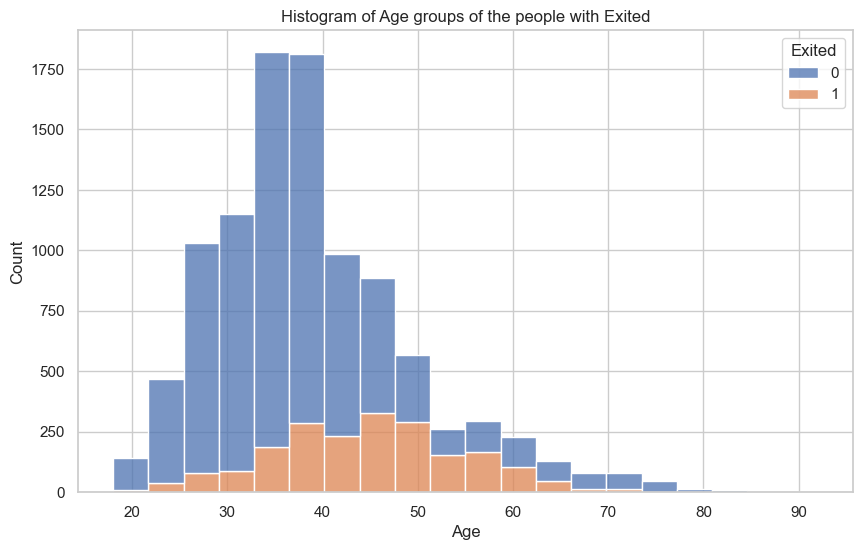

In [11]:
sns.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Age", hue="Exited", multiple="stack", bins=20)

# Adding labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age groups of the people with Exited")
plt.show()

In [12]:
#DROP UNNECESSARY COLUMNS 
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Label Encoding 

In [14]:
lb = preprocessing.LabelEncoder()
data['Geography']= lb.fit_transform(data['Geography'])
data['Gender']= lb.fit_transform(data['Gender'])

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Train-Test split

In [16]:
X = data.iloc[:,0:10]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [17]:
Y = data['Exited']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [18]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state =7)

### Model 1: Logistic Regression

In [21]:
model1 = LogisticRegression()

In [22]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [23]:
Y_pred1 = model1.predict(X_test)

In [24]:
model1_acc = accuracy_score(Y_test,Y_pred1)
model1_pre = precision_score(Y_test,Y_pred1)
model1_recall = recall_score(Y_test,Y_pred1)
model1_f1_score = f1_score(Y_test,Y_pred1)
print ("Accuracy (Logistic Regression) = ",model1_acc*100)
print ("Precision (Logistic Regression) = ",model1_pre*100)
print ("Recall (Logistic Regression) = ",model1_recall*100)
print ("F1 score (Logistic Regression) = ",model1_f1_score*100)

Accuracy (Logistic Regression) =  81.16666666666667
Precision (Logistic Regression) =  60.98901098901099
Recall (Logistic Regression) =  18.34710743801653
F1 score (Logistic Regression) =  28.208386277001274


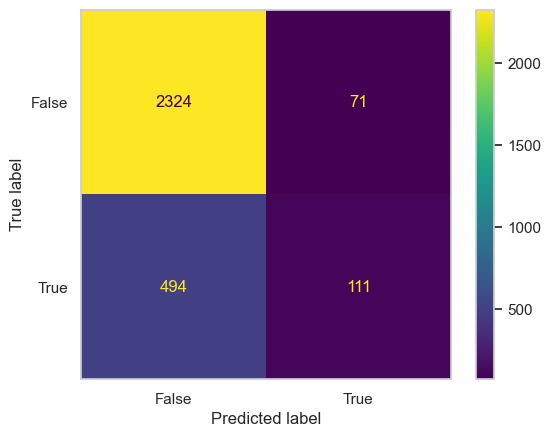

In [25]:
#Confusion Matrix from Logistic Regression
cm1=confusion_matrix(Y_test,Y_pred1)
cm_matrix=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=[False,True])
cm_matrix.plot()
plt.grid(False)
plt.show()

### Model 2: KNN classification

In [26]:
model2 = KNeighborsClassifier(n_neighbors = 7)

In [27]:
model2.fit(np.array(X_train),np.array(Y_train))

KNeighborsClassifier(n_neighbors=7)

In [28]:
Y_pred2 = model2.predict(np.array(X_test))

In [29]:
model2_acc = accuracy_score(Y_test,Y_pred2)
model2_pre = precision_score(Y_test,Y_pred2)
model2_recall = recall_score(Y_test,Y_pred2)
model2_f1_score = f1_score(Y_test,Y_pred2)
print ("Accuracy (KNN Model) = ",model2_acc*100)
print ("Precision (KNN Model) = ",model2_pre*100)
print ("Recall (KNN Model) = ",model2_recall*100)
print ("F1 score (KNN Model) = ",model2_f1_score*100)

Accuracy (KNN Model) =  83.7
Precision (KNN Model) =  66.38418079096046
Recall (KNN Model) =  38.84297520661157
F1 score (KNN Model) =  49.00938477580814


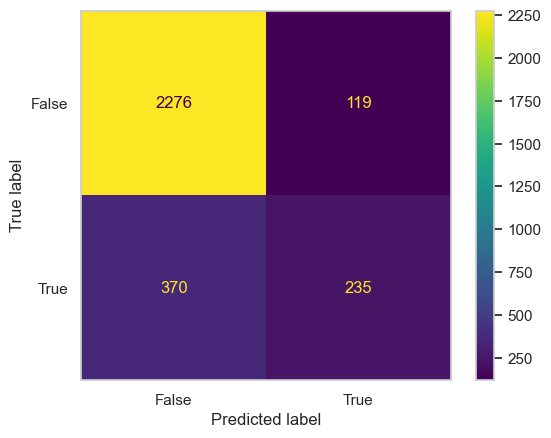

In [30]:
#Confusion Matrix from KNN Model
cm2=confusion_matrix(Y_test,Y_pred2)
cm_matrix=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=[False,True])
cm_matrix.plot()
plt.grid(False)
plt.show()

### Model 3: Decision Tree

In [31]:
model3 = DecisionTreeClassifier()

In [32]:
model3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
Y_pred3 = model3.predict(X_test)

In [34]:
model3_acc = accuracy_score(Y_test,Y_pred3)
model3_pre = precision_score(Y_test,Y_pred3)
model3_recall = recall_score(Y_test,Y_pred3)
model3_f1_score = f1_score(Y_test,Y_pred3)
print ("Accuracy (Decision Tree) = ",model3_acc*100)
print ("Precision (Decision Tree) = ",model3_pre*100)
print ("Recall (Decision Tree) = ",model3_recall*100)
print ("F1 score (Decision Tree) = ",model3_f1_score*100)

Accuracy (Decision Tree) =  78.83333333333333
Precision (Decision Tree) =  47.68518518518518
Recall (Decision Tree) =  51.074380165289256
F1 score (Decision Tree) =  49.32162809257782


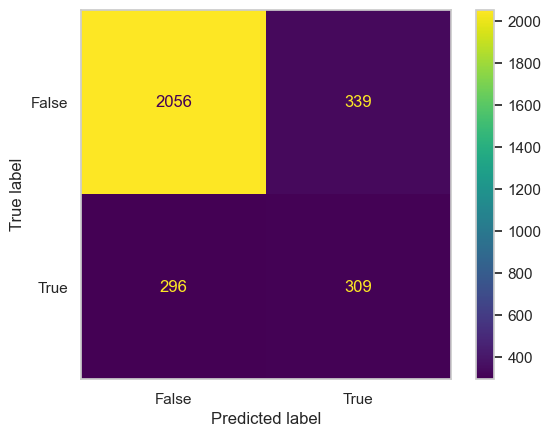

In [35]:
#Confusion Matrix from Logistic Decision Tree
cm3=confusion_matrix(Y_test,Y_pred3)
cm_matrix=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=[False,True])
cm_matrix.plot()
plt.grid(False)
plt.show()

### Model 4: Support Vector

In [36]:
model4 = SVC(random_state=7)

In [37]:
model4.fit(X_train,Y_train)

SVC(random_state=7)

In [38]:
Y_pred4 = model4.predict(X_test)

In [39]:
model4_acc = accuracy_score(Y_test,Y_pred4)
model4_pre = precision_score(Y_test,Y_pred4,zero_division=1)
model4_recall = recall_score(Y_test,Y_pred4)
model4_f1_score = f1_score(Y_test,Y_pred4)
print ("Accuracy (Support vector) = ",model4_acc*100)
print ("Precision (Support vector) = ",model4_pre*100)
print ("Recall (Support vector) = ",model4_recall*100)
print ("F1 score (Support vector) = ",model4_f1_score*100)

Accuracy (Support vector) =  85.86666666666667
Precision (Support vector) =  80.88737201365188
Recall (Support vector) =  39.17355371900826
F1 score (Support vector) =  52.78396436525613


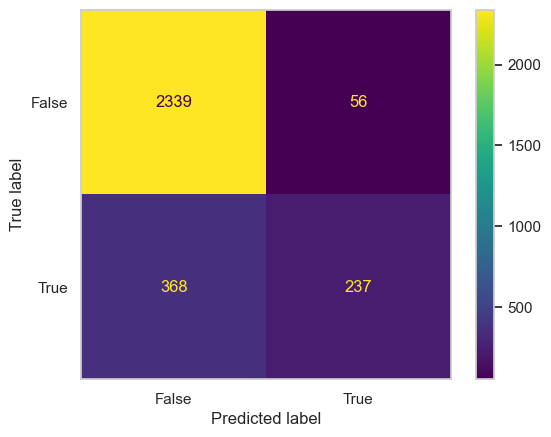

In [40]:
#Confusion Matrix from Logistic Decision Tree
cm4=confusion_matrix(Y_test,Y_pred4)
cm_matrix=ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=[False,True])
cm_matrix.plot()
plt.grid(False)
plt.show()

### Random Forest

In [41]:
model5 = RandomForestClassifier(random_state=0,n_estimators=10)

In [42]:
model5.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [43]:
Y_pred5 = model5.predict(X_test)

In [44]:
model5_acc = accuracy_score(Y_test,Y_pred5)
model5_pre = precision_score(Y_test,Y_pred5)
model5_recall = recall_score(Y_test,Y_pred5)
model5_f1_score = f1_score(Y_test,Y_pred5)
print ("Accuracy (Random Forest) = ",model5_acc*100)
print ("Precision (Random Forest) = ",model5_pre*100)
print ("Recall (Random Forest) = ",model5_recall*100)
print ("F1 score (Random Forest) = ",model5_f1_score*100)

Accuracy (Random Forest) =  85.0
Precision (Random Forest) =  71.00271002710026
Recall (Random Forest) =  43.30578512396694
F1 score (Random Forest) =  53.7987679671458


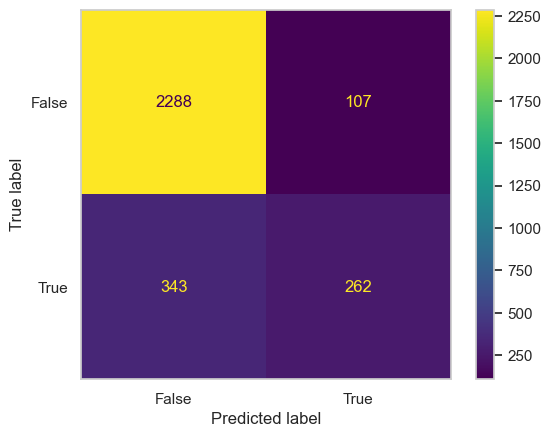

In [45]:
#Confusion Matrix from Logistic Decision Tree
cm5=confusion_matrix(Y_test,Y_pred5)
cm_matrix=ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=[False,True])
cm_matrix.plot()
plt.grid(False)
plt.show()

In [46]:
accuracy = [model1_acc*100,model2_acc*100,model3_acc*100,model4_acc*100,model5_acc*100]
precision = [model1_pre*100,model2_pre*100,model3_pre*100,model4_pre*100,model5_pre*100]
recall = [model1_recall*100,model2_recall*100,model3_recall*100,model4_recall*100,model5_recall*100]
f1_score = [model1_f1_score*100,model2_f1_score*100,model3_f1_score*100,model4_f1_score*100,model5_f1_score*100]

In [47]:
results = pd.DataFrame({"Model":["Logistic Regression","KNN Model","Decision Tree","Support Vector","Random Forest"],"Accuracy Score":accuracy,"Precision Score":precision,"Recall Score":recall,"F1_Score":f1_score})
results

,Model,Accuracy Score,Precision Score,Recall Score,F1_Score
0,Logistic Regression,81.166667,60.989011,18.347107,28.208386
1,KNN Model,83.700000,66.384181,38.842975,49.009385
2,Decision Tree,78.833333,47.685185,51.074380,49.321628
3,Support Vector,85.866667,80.887372,39.173554,52.783964
4,Random Forest,85.000000,71.002710,43.305785,53.798768


### Test model with input data

In [54]:
X_input = [[730,1,0,39,4,22516.89,3,1,0,223131],[600,2,1,40,2,0.00,1,1,1,67353.89]]

In [55]:
X_input = sc.fit_transform(X_input)

In [56]:
Y_output = model2.predict(X_input)

In [57]:
Y_output

array([0, 1], dtype=int64)